<a href="https://colab.research.google.com/github/sickk-sake/fire-detection/blob/main/notebook097f81b537.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR NOTEBOOK.
import kagglehub
elmadafri_the_wildfire_dataset_path = kagglehub.dataset_download('elmadafri/the-wildfire-dataset')

print('Data source import complete.')


100%|██████████| 9.94G/9.94G [01:55<00:00, 92.5MB/s]

Extracting files...


Data source import complete.


In [4]:
import kagglehub

# Download the latest version of the wildfire dataset
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("✅ Dataset downloaded at:", path)


✅ Dataset downloaded at: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


In [6]:
# TO ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')

GPU is Unavailable!


In [7]:
# Load and explore the dataset
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

In [8]:
# Set dataset directories
train_dir = os.path.join(path, "the_wildfire_dataset_2n_version/train")
val_dir = os.path.join(path, "the_wildfire_dataset_2n_version/val")
test_dir = os.path.join(path, "the_wildfire_dataset_2n_version/test")


In [9]:
classes = sorted(os.listdir(train_dir))
num_classes = len(classes)

print(f' Number of Classes: {num_classes}')
print(f' Classes: {classes}')


🔥 Number of Classes: 2
📂 Classes: ['fire', 'nofire']


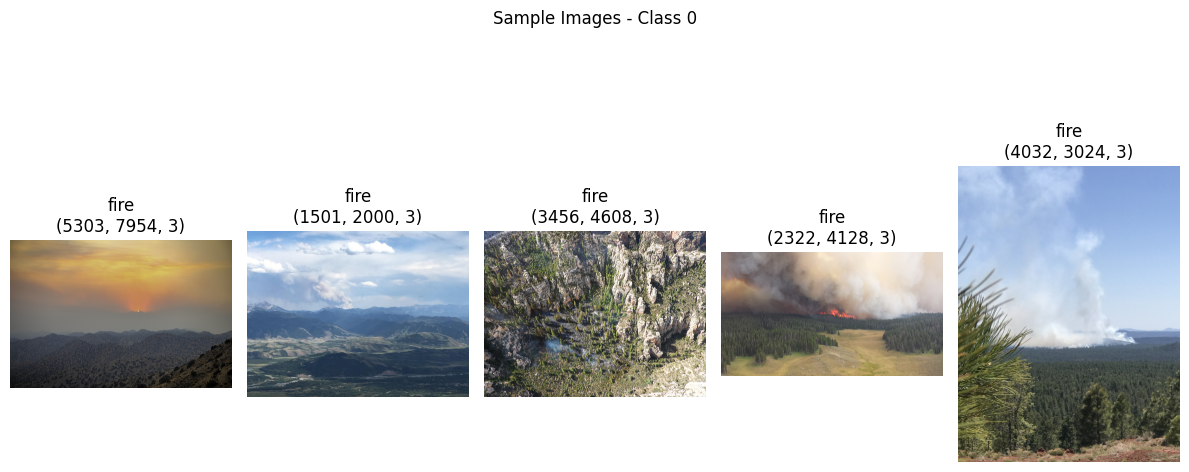

In [10]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 6))
class0_path = os.path.join(train_dir, classes[0])

for i, img_name in enumerate(os.listdir(class0_path)[:5]):
    img_path = os.path.join(class0_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'{classes[0]}\n{img.shape}')
    plt.axis('off')
plt.suptitle("Sample Images - Class 0")
plt.tight_layout()
plt.show()


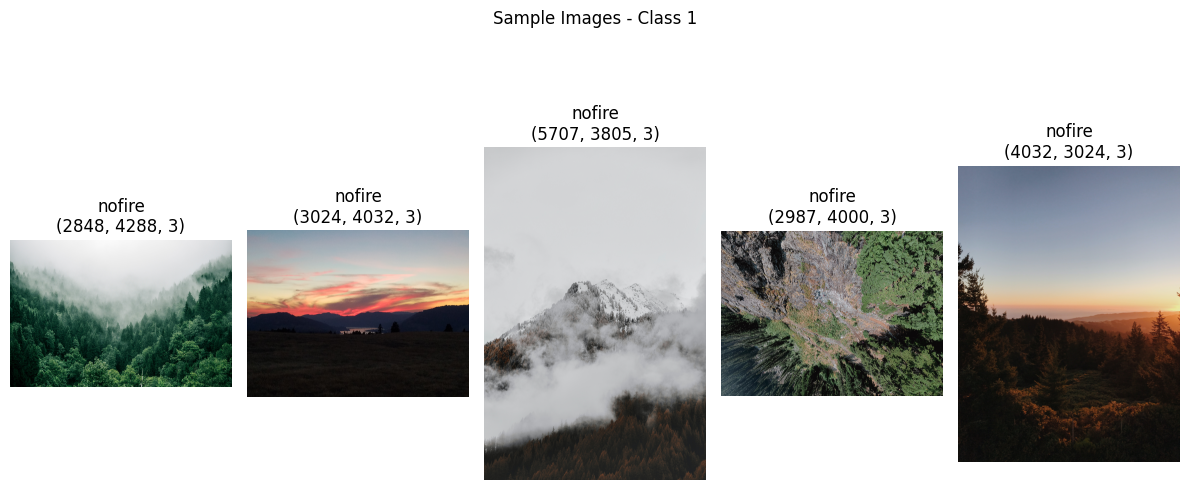

In [11]:
# Let's visualize2 the images in the dataset
plt.figure(figsize=(12, 6))
class1_path = os.path.join(train_dir, classes[1])

for i, img_name in enumerate(os.listdir(class1_path)[:5]):
    img_path = os.path.join(class1_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f'{classes[1]}\n{img.shape}')
    plt.axis('off')
plt.suptitle("Sample Images - Class 1")
plt.tight_layout()
plt.show()


In [12]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directories
train_data = train_datagen.flow_from_directory(train_dir, target_size=(128, 128), batch_size=32, class_mode='binary')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(128, 128), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(128, 128), batch_size=32, class_mode='binary', shuffle=False)


Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [13]:
# Build CNN model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/59 ━━━━━━━━━━━━━━━━━━━━ 2:49 9s/step - accuracy: 0.5859 - loss: 0.7148

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


47/59 ━━━━━━━━━━━━━━━━━━━━ 1:46 9s/step - accuracy: 0.5916 - loss: 0.7030

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 ━━━━━━━━━━━━━━━━━━━━ 655s 11s/step - accuracy: 0.6004 - loss: 0.6863 - val_accuracy: 0.6642 - val_loss: 0.6693
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 632s 11s/step - accuracy: 0.7007 - loss: 0.5362 - val_accuracy: 0.7189 - val_loss: 0.4980
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 636s 11s/step - accuracy: 0.7409 - loss: 0.5143 - val_accuracy: 0.7537 - val_loss: 0.4848
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 661s 11s/step - accuracy: 0.7505 - loss: 0.4879 - val_accuracy: 0.7338 - val_loss: 0.5182
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 621s 11s/step - accuracy: 0.7811 - loss: 0.4619 - val_accuracy: 0.7537 - val_loss: 0.5706
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 627s 11s/step - accuracy: 0.7822 - loss: 0.4409 - val_accuracy: 0.7388 - val_loss: 0.4959
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 660s 11s/step - accuracy: 0.7815 - loss: 0.4511 - val_accuracy: 0.7711 - val_loss: 0.4627
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 660s 11s/step - accuracy: 0.7945 - loss: 0.4458 - val_accuracy: 0.7910 - val_

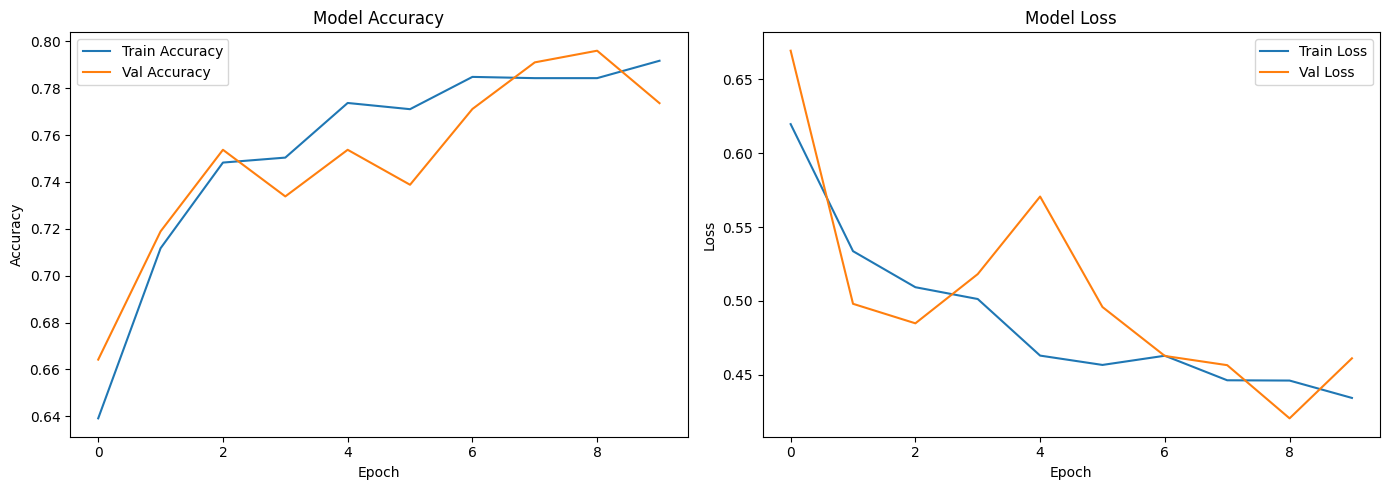

In [15]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
